In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from model_evaluation_methods import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


df = pd.read_csv('cleaned_cancer.csv')
df = df.drop(['index', 'Patient Id'], axis=1)



X = df.drop('Level', axis=1)
y = df['Level']

In [2]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

Model Evaluation for Feature Selection - Linear Kernel:
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
F-measure: 1.0

Model Evaluation for Feature Selection - Polynomial Kernel:
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
F-measure: 1.0

Model Evaluation for Feature Selection - RBF Kernel:
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
F-measure: 1.0


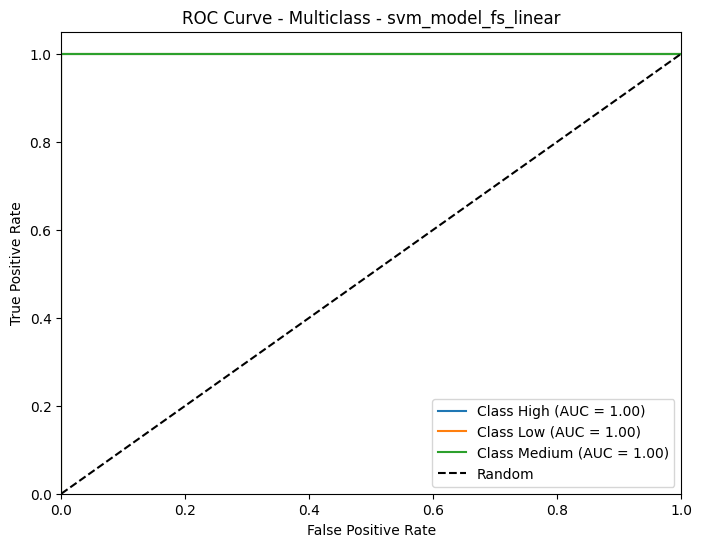

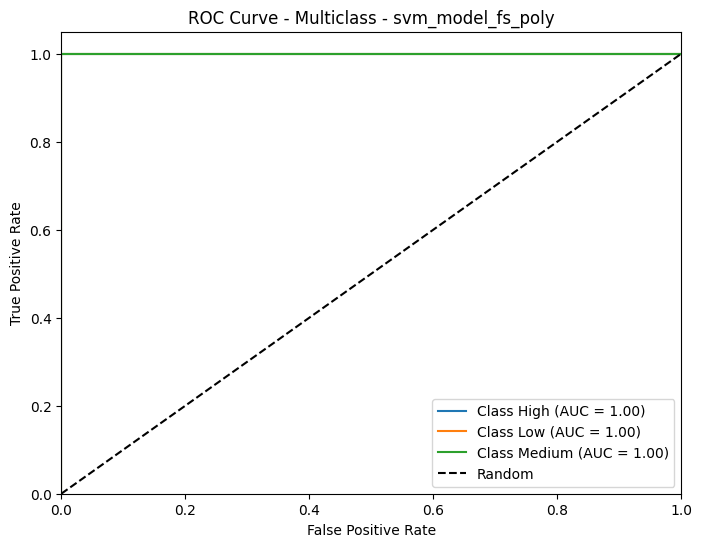

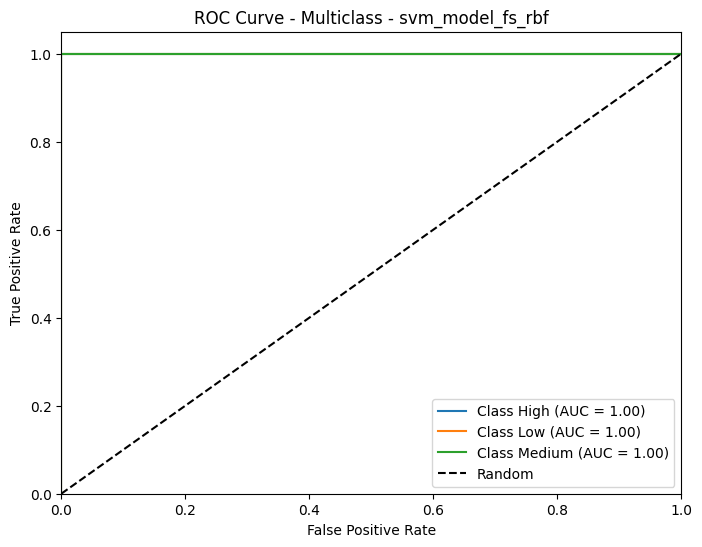

In [3]:
selector = SelectFromModel(SVC(kernel='linear', decision_function_shape='ovr'))
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

svm_model_fs_linear = SVC(kernel='linear', decision_function_shape='ovr', probability=True, random_state=42)
svm_model_fs_linear.fit(X_train_selected, y_train)

svm_model_fs_poly = SVC(kernel='poly', decision_function_shape='ovr', probability=True, random_state=42)
svm_model_fs_poly.fit(X_train_selected, y_train)

svm_model_fs_rbf = SVC(kernel='rbf', decision_function_shape='ovr', probability=True, random_state=42)
svm_model_fs_rbf.fit(X_train_selected, y_train)

y_pred_fs_linear = svm_model_fs_linear.predict(X_test_selected)
y_pred_fs_poly = svm_model_fs_poly.predict(X_test_selected)
y_pred_fs_rbf = svm_model_fs_rbf.predict(X_test_selected)

conf_matrix_fs_linear = confusion_matrix(y_test, y_pred_fs_linear)
error_rate_fs_linear = calculate_error_rate(conf_matrix_fs_linear)
sensitivity_fs_linear,precision_fs_linear, f_measure_fs_linear = calculate_metrics(y_test, y_pred_fs_linear)
accuracy_fs_linear = accuracy_score(y_test, y_pred_fs_linear)

conf_matrix_fs_poly = confusion_matrix(y_test, y_pred_fs_poly)
error_rate_fs_poly = calculate_error_rate(conf_matrix_fs_poly)
sensitivity_fs_poly,precision_fs_poly, f_measure_fs_poly = calculate_metrics(y_test, y_pred_fs_poly)
accuracy_fs_poly = accuracy_score(y_test, y_pred_fs_poly)

conf_matrix_fs_rbf = confusion_matrix(y_test, y_pred_fs_rbf)
error_rate_fs_rbf = calculate_error_rate(conf_matrix_fs_rbf)
sensitivity_fs_rbf,precision_fs_rbf, f_measure_fs_rbf = calculate_metrics(y_test, y_pred_fs_rbf)
accuracy_fs_rbf = accuracy_score(y_test, y_pred_fs_rbf)

print("Model Evaluation for Feature Selection - Linear Kernel:")
print("Accuracy:", accuracy_fs_linear)
print("Error Rate:", error_rate_fs_linear)
print("Precision:", precision_fs_linear)
print("F-measure:", f_measure_fs_linear)

print("\nModel Evaluation for Feature Selection - Polynomial Kernel:")
print("Accuracy:", accuracy_fs_poly)
print("Error Rate:", error_rate_fs_poly)
print("Precision:", precision_fs_poly)
print("F-measure:", f_measure_fs_poly)

print("\nModel Evaluation for Feature Selection - RBF Kernel:")
print("Accuracy:", accuracy_fs_rbf)
print("Error Rate:", error_rate_fs_rbf)
print("Precision:", precision_fs_rbf)
print("F-measure:", f_measure_fs_rbf)

plot_roc_curve_multiclass(y_test, svm_model_fs_linear.decision_function(X_test_selected), svm_model_fs_linear.classes_, 'svm_model_fs_linear')
plot_roc_curve_multiclass(y_test, svm_model_fs_poly.decision_function(X_test_selected), svm_model_fs_poly.classes_, 'svm_model_fs_poly')
plot_roc_curve_multiclass(y_test, svm_model_fs_rbf.decision_function(X_test_selected), svm_model_fs_rbf.classes_, 'svm_model_fs_rbf')


Model Evaluation for PCA - Linear Kernel:
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
F-measure: 1.0

Model Evaluation for PCA - Polynomial Kernel:
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
F-measure: 1.0

Model Evaluation for PCA - RBF Kernel:
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
F-measure: 1.0


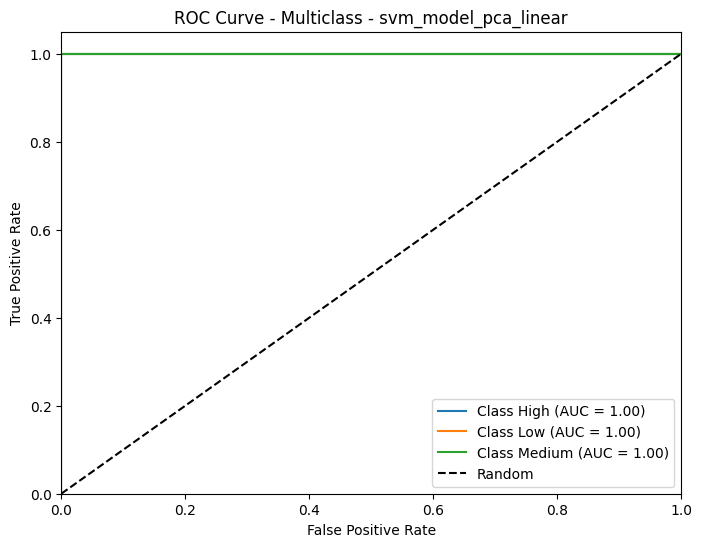

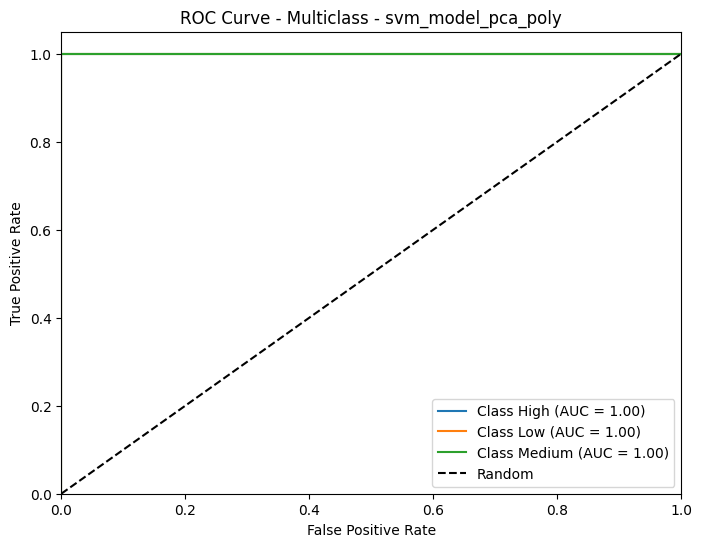

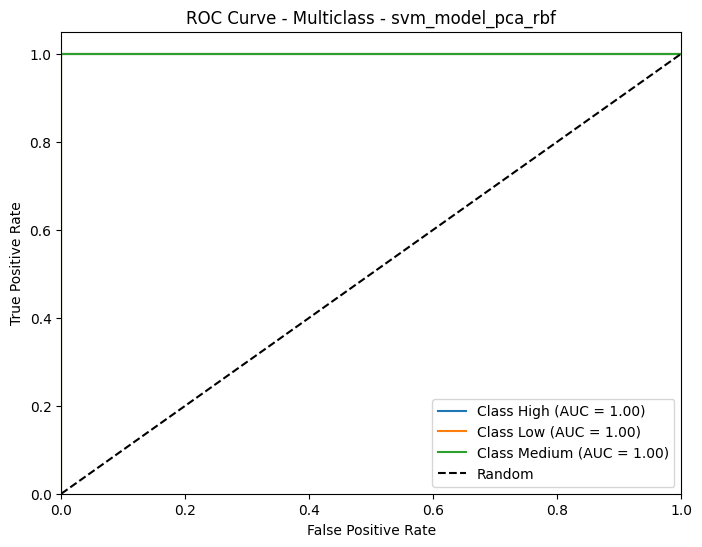

In [4]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm_model_pca_linear = SVC(kernel='linear', decision_function_shape='ovr', probability=True, random_state=42)
svm_model_pca_linear.fit(X_train_pca, y_train)

svm_model_pca_poly = SVC(kernel='poly', decision_function_shape='ovr', probability=True, random_state=42)
svm_model_pca_poly.fit(X_train_pca, y_train)

svm_model_pca_rbf = SVC(kernel='rbf', decision_function_shape='ovr', probability=True, random_state=42)
svm_model_pca_rbf.fit(X_train_pca, y_train)

y_pred_pca_linear = svm_model_pca_linear.predict(X_test_pca)
y_pred_pca_poly = svm_model_pca_poly.predict(X_test_pca)
y_pred_pca_rbf = svm_model_pca_rbf.predict(X_test_pca)


conf_matrix_pca_linear = confusion_matrix(y_test, y_pred_pca_linear)
error_rate_pca_linear = calculate_error_rate(conf_matrix_pca_linear)
sensitivity_pca_linear,precision_pca_linear, f_measure_pca_linear = calculate_metrics(y_test, y_pred_pca_linear)
accuracy_pca_linear = accuracy_score(y_test, y_pred_pca_linear)

conf_matrix_pca_poly = confusion_matrix(y_test, y_pred_pca_poly)
error_rate_pca_poly = calculate_error_rate(conf_matrix_pca_poly)
sensitivity_pca_poly,precision_pca_poly, f_measure_pca_poly = calculate_metrics(y_test, y_pred_pca_poly)
accuracy_pca_poly = accuracy_score(y_test, y_pred_pca_poly)

conf_matrix_pca_rbf = confusion_matrix(y_test, y_pred_pca_rbf)
error_rate_pca_rbf = calculate_error_rate(conf_matrix_pca_rbf)
sensitivity_pca_rbf,precision_pca_rbf, f_measure_pca_rbf = calculate_metrics(y_test, y_pred_pca_rbf)
accuracy_pca_rbf = accuracy_score(y_test, y_pred_pca_rbf)

print("\nModel Evaluation for PCA - Linear Kernel:")
print("Accuracy:", accuracy_pca_linear)
print("Error Rate:", error_rate_pca_linear)
print("Precision:", precision_pca_linear)
print("F-measure:", f_measure_pca_linear)

print("\nModel Evaluation for PCA - Polynomial Kernel:")
print("Accuracy:", accuracy_pca_poly)
print("Error Rate:", error_rate_pca_poly)
print("Precision:", precision_pca_poly)
print("F-measure:", f_measure_pca_poly)

print("\nModel Evaluation for PCA - RBF Kernel:")
print("Accuracy:", accuracy_pca_rbf)
print("Error Rate:", error_rate_pca_rbf)
print("Precision:", precision_pca_rbf)
print("F-measure:", f_measure_pca_rbf)

plot_roc_curve_multiclass(y_test, svm_model_pca_linear.decision_function(X_test_pca), svm_model_pca_linear.classes_, 'svm_model_pca_linear')
plot_roc_curve_multiclass(y_test, svm_model_pca_poly.decision_function(X_test_pca), svm_model_pca_poly.classes_, 'svm_model_pca_poly')
plot_roc_curve_multiclass(y_test, svm_model_pca_rbf.decision_function(X_test_pca), svm_model_pca_rbf.classes_, 'svm_model_pca_rbf')




Model Evaluation for Full Dataset - Linear Kernel:
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
F-measure: 1.0

Model Evaluation for Full Dataset - Polynomial Kernel:
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
F-measure: 1.0

Model Evaluation for Full Dataset - RBF Kernel:
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
F-measure: 1.0


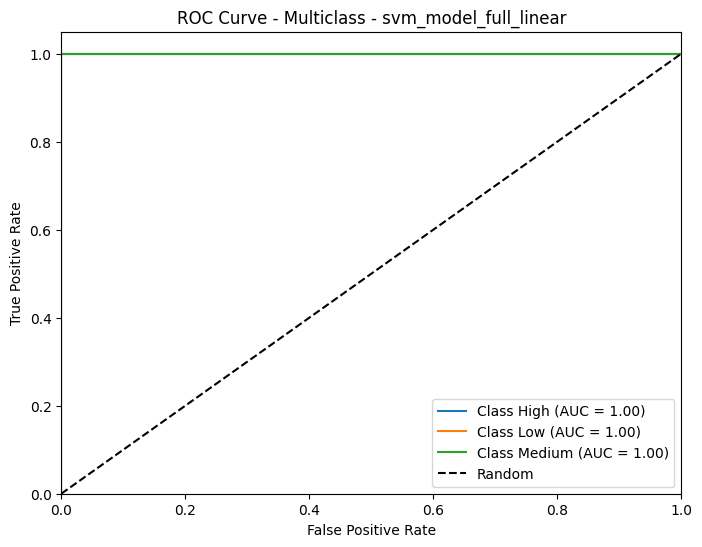

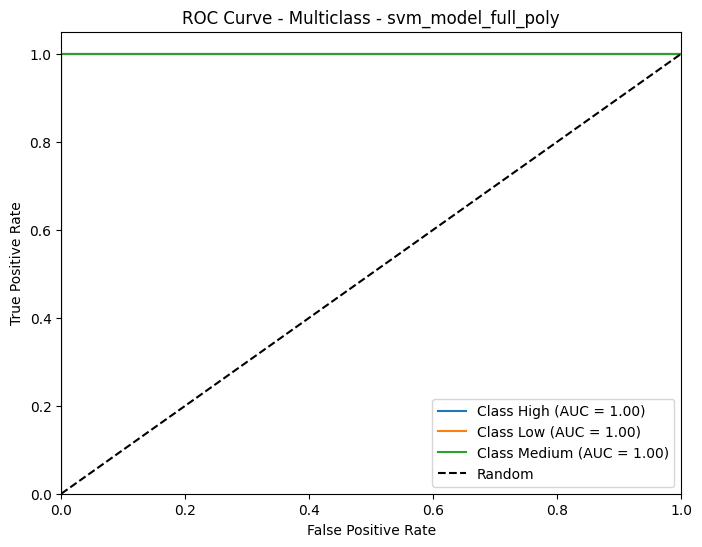

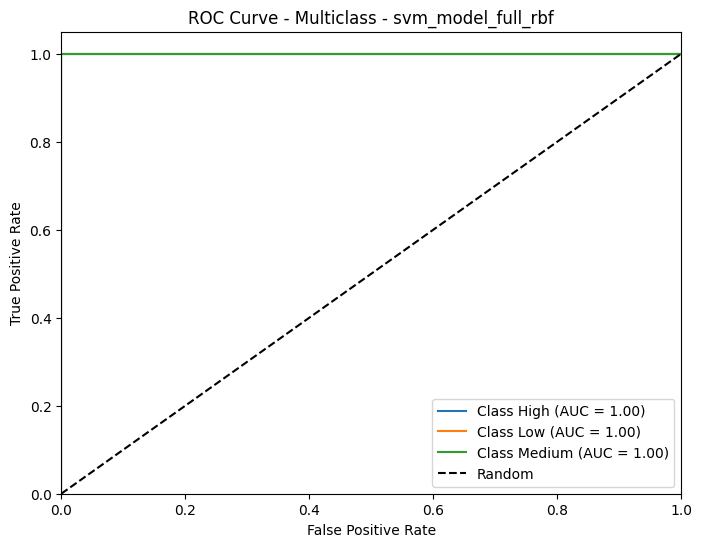

In [5]:
svm_model_full_linear = SVC(kernel='linear', decision_function_shape='ovr', probability=True, random_state=42)
svm_model_full_linear.fit(X_train, y_train)

svm_model_full_poly = SVC(kernel='poly', decision_function_shape='ovr', probability=True, random_state=42)
svm_model_full_poly.fit(X_train, y_train)

svm_model_full_rbf = SVC(kernel='rbf', decision_function_shape='ovr', probability=True, random_state=42)
svm_model_full_rbf.fit(X_train, y_train)

y_pred_full_linear = svm_model_full_linear.predict(X_test)
y_pred_full_poly = svm_model_full_poly.predict(X_test)
y_pred_full_rbf = svm_model_full_rbf.predict(X_test)

conf_matrix_full_linear = confusion_matrix(y_test, y_pred_full_linear)
error_rate_full_linear = calculate_error_rate(conf_matrix_full_linear)
sensitivity_full_linear, precision_full_linear, f_measure_full_linear = calculate_metrics(y_test, y_pred_full_linear)
accuracy_full_linear = accuracy_score(y_test, y_pred_full_linear)

conf_matrix_full_poly = confusion_matrix(y_test, y_pred_full_poly)
error_rate_full_poly = calculate_error_rate(conf_matrix_full_poly)
sensitivity_full_poly, precision_full_poly, f_measure_full_poly = calculate_metrics(y_test, y_pred_full_poly)
accuracy_full_poly = accuracy_score(y_test, y_pred_full_poly)

conf_matrix_full_rbf = confusion_matrix(y_test, y_pred_full_rbf)
error_rate_full_rbf = calculate_error_rate(conf_matrix_full_rbf)
sensitivity_full_rbf, precision_full_rbf, f_measure_full_rbf = calculate_metrics(y_test, y_pred_full_rbf)
accuracy_full_rbf = accuracy_score(y_test, y_pred_full_rbf)

print("\nModel Evaluation for Full Dataset - Linear Kernel:")
print("Accuracy:", accuracy_full_linear)
print("Error Rate:", error_rate_full_linear)
print("Precision:", precision_full_linear)
print("F-measure:", f_measure_full_linear)

print("\nModel Evaluation for Full Dataset - Polynomial Kernel:")
print("Accuracy:", accuracy_full_poly)
print("Error Rate:", error_rate_full_poly)
print("Precision:", precision_full_poly)
print("F-measure:", f_measure_full_poly)

print("\nModel Evaluation for Full Dataset - RBF Kernel:")
print("Accuracy:", accuracy_full_rbf)
print("Error Rate:", error_rate_full_rbf)
print("Precision:", precision_full_rbf)
print("F-measure:", f_measure_full_rbf)

plot_roc_curve_multiclass(y_test, svm_model_full_linear.decision_function(X_test), svm_model_full_linear.classes_, 'svm_model_full_linear')
plot_roc_curve_multiclass(y_test, svm_model_full_poly.decision_function(X_test), svm_model_full_poly.classes_, 'svm_model_full_poly')
plot_roc_curve_multiclass(y_test, svm_model_full_rbf.decision_function(X_test), svm_model_full_rbf.classes_, 'svm_model_full_rbf')




Training vs Testing Accuracy Comparison:
Feature Selection - Training Accuracy: 1.0 Testing Accuracy: 1.0
PCA - Training Accuracy: 1.0 Testing Accuracy: 1.0
Full Dataset - Training Accuracy: 1.0 Testing Accuracy: 1.0
Cross-Validation Scores:
Feature Selection - Mean CV Accuracy: 1.0
PCA - Mean CV Accuracy: 0.9986842105263157
Full Dataset - Mean CV Accuracy: 0.9986842105263157


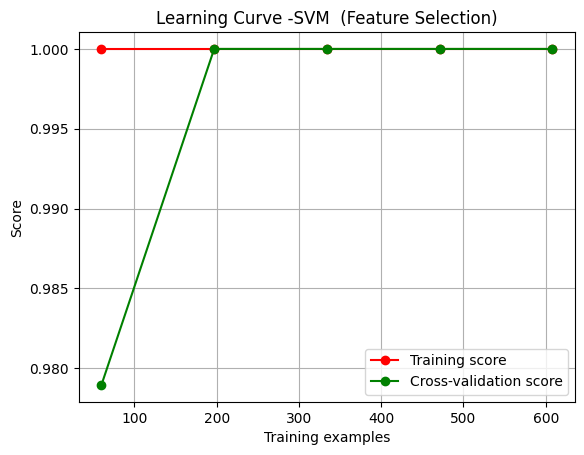

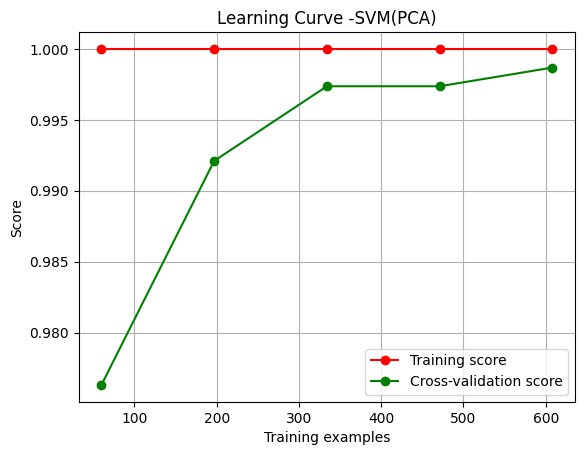

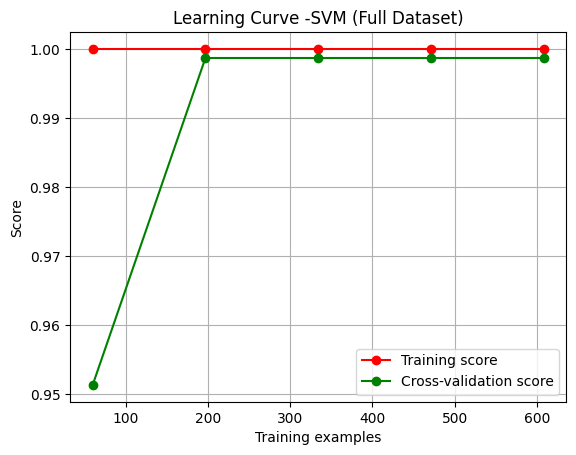

In [6]:

y_train_pred_fs = svm_model_fs_linear.predict(X_train_selected)
y_train_pred_pca = svm_model_pca_linear.predict(X_train_pca)
y_train_pred_full = svm_model_full_linear.predict(X_train)

train_accuracy_fs = accuracy_score(y_train, y_train_pred_fs)
train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
train_accuracy_full = accuracy_score(y_train, y_train_pred_full)

print("Training vs Testing Accuracy Comparison:")
print("Feature Selection - Training Accuracy:", train_accuracy_fs, "Testing Accuracy:", accuracy_fs_linear)
print("PCA - Training Accuracy:", train_accuracy_pca, "Testing Accuracy:", accuracy_pca_linear)
print("Full Dataset - Training Accuracy:", train_accuracy_full, "Testing Accuracy:", accuracy_full_linear)

cv_scores_fs = cross_val_score(svm_model_fs_linear, X_train_selected, y_train, cv=5, scoring='accuracy')
cv_scores_pca = cross_val_score(svm_model_pca_linear, X_train_pca, y_train, cv=5, scoring='accuracy')
cv_scores_full = cross_val_score(svm_model_full_linear, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:")
print("Feature Selection - Mean CV Accuracy:", np.mean(cv_scores_fs))
print("PCA - Mean CV Accuracy:", np.mean(cv_scores_pca))
print("Full Dataset - Mean CV Accuracy:", np.mean(cv_scores_full))

plot_learning_curve(svm_model_fs_linear, "Learning Curve -SVM  (Feature Selection)", X_train_selected, y_train)
plot_learning_curve(svm_model_pca_linear, "Learning Curve -SVM(PCA)", X_train_pca, y_train)
plot_learning_curve(svm_model_full_linear, "Learning Curve -SVM (Full Dataset)", X_train, y_train)
plt.show()